# This Notebook is to satisfy Tuomo curiosity
"""
So in this example the color oscillation seemed significant and you also had the harmonic content. I still wonder if we can find a case where color oscillations are present without having the harmonic content. If so, I would be interested in understanding why is that.
"""



In [1]:
#%matplotlib inline
from __future__ import division

import os
import sys
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import ks_2samp
from matplotlib.offsetbox import AnchoredText
import matplotlib.gridspec as gridspec

import scipy.stats.distributions as dist



In [2]:
# Defining few functions for fitting


def sinfunc(phase, A, p, c):
    
    return A * np.sin(phase*2.0*np.pi + p) + c


def sin2func(phase, A, p, c, A2, p2):

        return A*np.sin(phase*2.0*np.pi + p) + A2*np.sin(phase*4.0*np.pi + p2) + c
    


def fit2sin(data):
    
    
    counts=data#.sum(axis=0)
    
    phase=np.linspace(0,1,17)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0, A20, p20]
    popt, pcov = scipy.optimize.curve_fit(sin2func, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt 

 
def fitsin(data):
    
    
    counts=data#.sum(axis=0)
    
    phase=np.linspace(0,1,17)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0]
    popt, pcov = scipy.optimize.curve_fit(sinfunc, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt 

In [3]:
def plot_one(case, par_set, path="../run_model_1/Data_cases_Model_1/"):
    
    """ Function that takes the case and set and plot the harmonic content fraction"""
    
    phase=np.linspace(0,1,17)[:-1]
    
    fig, ax=plt.subplots(figsize=(9,5))
    
    for filename in os.listdir(path):

            if filename.startswith("data_C{}_set{}".format(case, par_set)):
                data_name=filename
                #print(data)
                expo_time=float(filename[21:])

                data = np.loadtxt(path+data_name)
                
    counts=data.sum(axis=0)
    
    lower=data[:7, :].sum(axis=0)
    upper=data[7:, :].sum(axis=0)
    
    color=upper/lower
    
    color_norm=1/max(color)
    
    
                
    A, p, c, A2, p2 = fit2sin(counts)
    A1, p1, c1= fitsin(counts)
    Ac, pc, cc= fitsin(color)
    
    norm =1.0/max(data.sum(axis=0))
    
    Arms=sinfunc(phase, Ac, pc, cc).max()-sinfunc(phase, Ac, pc, cc).min()
    Brms=sinfunc(phase, Ac, pc, cc).max()+sinfunc(phase, Ac, pc, cc).min()
    
    rms_color=100*Arms/(Brms*np.sqrt(2))
    
    ratio=np.abs(A2/A)
    
    #print(rms_color)
    

    plt.plot(phase, norm*counts,"ko-", linewidth=2.0, label="Data")
    plt.plot(phase, color_norm*color,"ro-", linewidth=2.0)
    #ax[par_set-1].plot(phase, sinfunc(phase, A1, p1, c1), "-..", color="red", label="Single sin")
    plt.plot(phase, norm*sinfunc(phase, A, p, c), "r-+")

    #ax.plot(set1_phase, sinfunc(set1_phase, A2, p2, c), color='blue')
    plt.plot(phase, norm*sin2func(phase, A, p, c, A2, p2), "g-+",label="$C_2/C_1$ = {:.3f}".format(ratio))
    plt.plot(phase, color_norm*sinfunc(phase, Ac, pc, cc), "r-",label="color rms {:.3f} %".format(rms_color))
    
    anchored_text1 = AnchoredText("Case {}, set {}".format(case, par_set), loc=5)
    #anchored_text2 = AnchoredText("$10^5 photons$",loc=2)
    #ax[1].add_artist(anchored_text2)
    ax.add_artist(anchored_text1)
    #ax.add_artist(anchored_text2)
    
    #print(Ac, cc)
    
    plt.legend()
        

    
    
    return rms_color, ratio

                
     
    
    

In [4]:
# C1=[0,1,1]
# C2=[0,0,0]
# C3=[0,1,0]
# C4=[1,1,0]
# C5=[1,0,0]
# C6=[1,1,1]
# C7=[1,1,1]
# C8=[1,0,1]

In [5]:
### Mass and radius


C1=[0,1,1]
C2=[0,0,0]
C3=[0,1,0]
C4=[0,1,0]
C5=[1,1,0]
C6=[1,1,0]
C7=[1,1,1]
C8=[1,0,1]

/home/yves/anaconda2/envs/xpsi/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


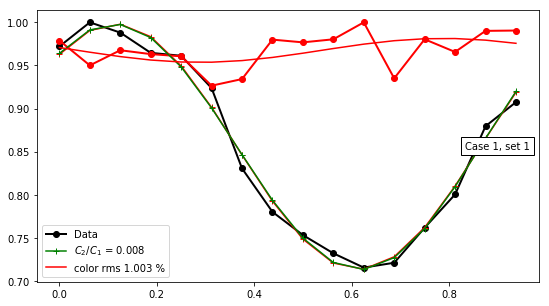

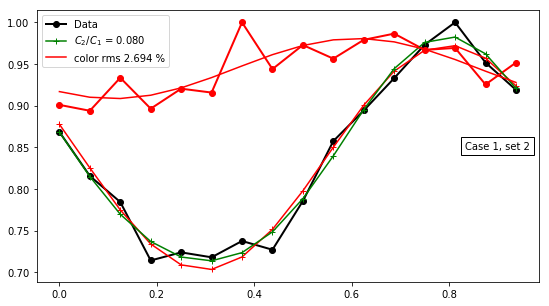

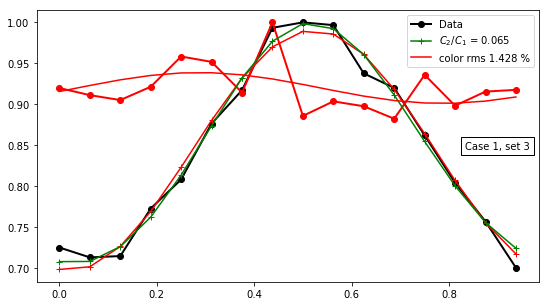

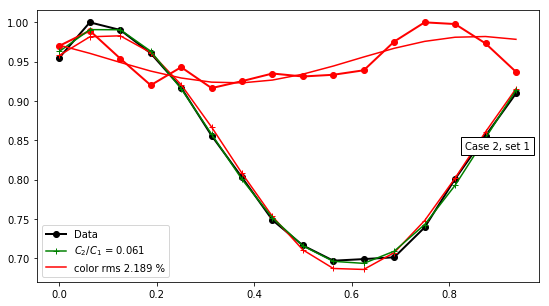

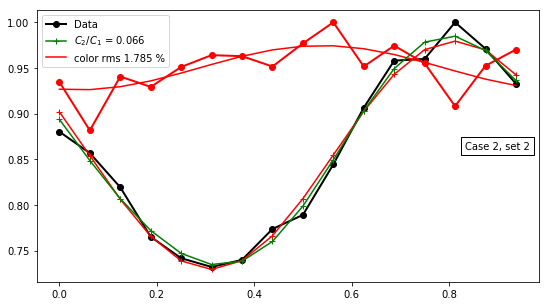

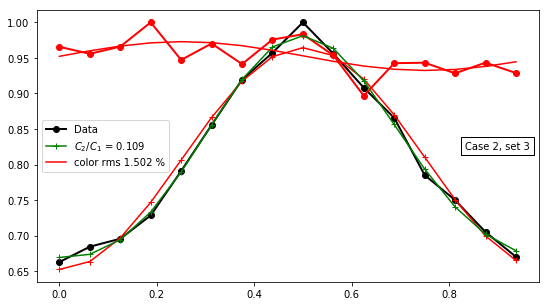

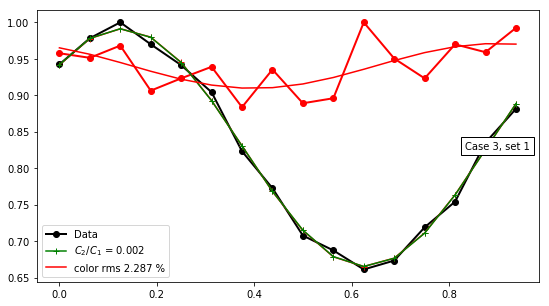

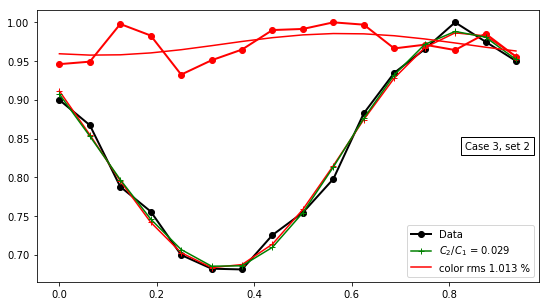

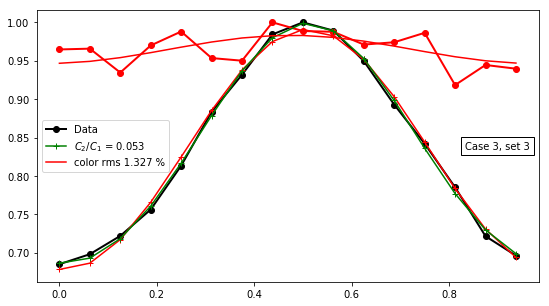

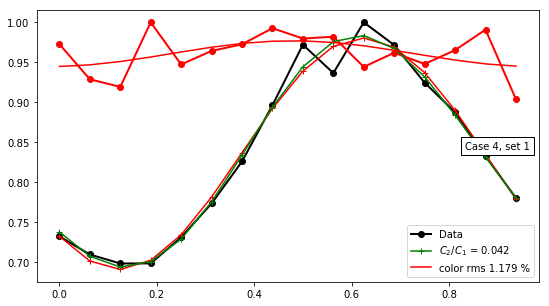

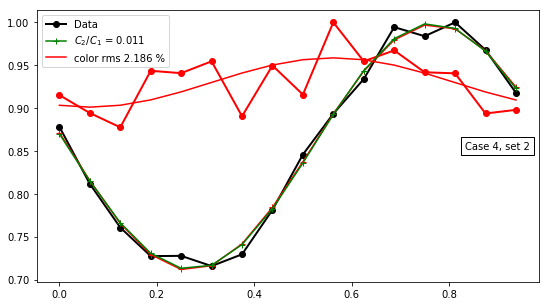

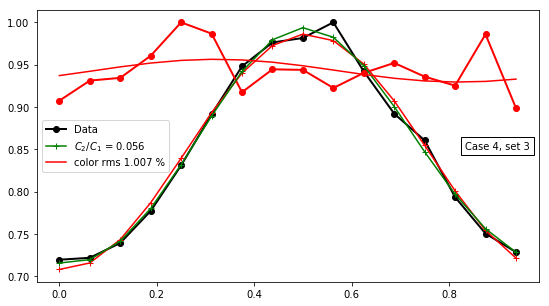

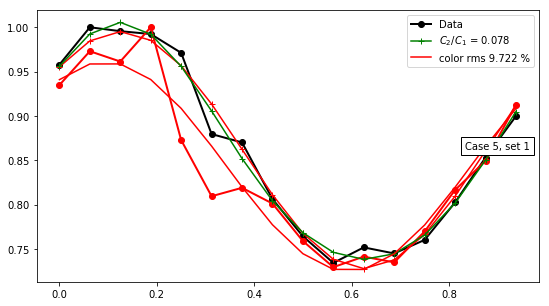

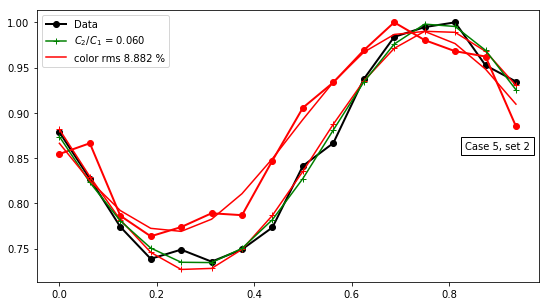

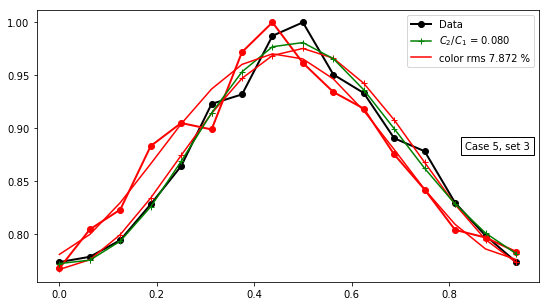

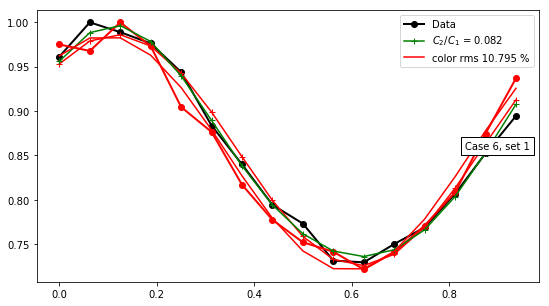

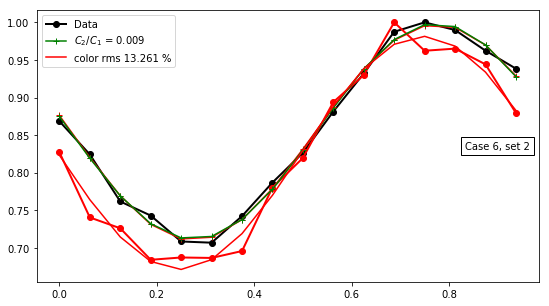

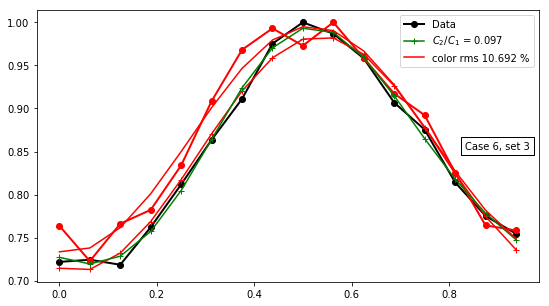

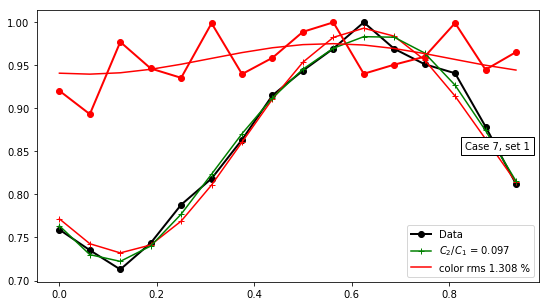

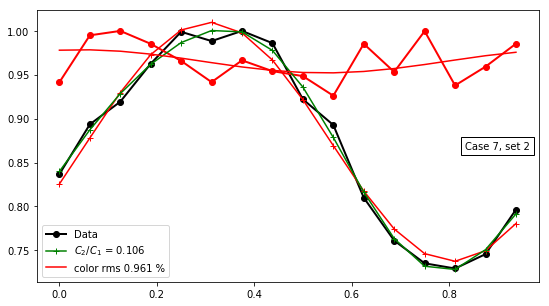

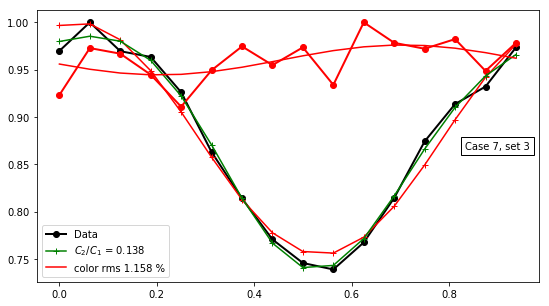

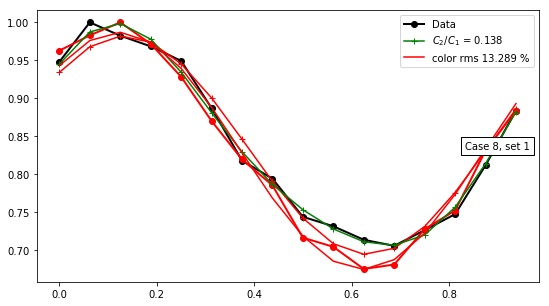

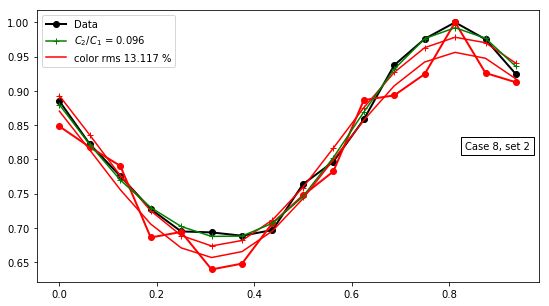

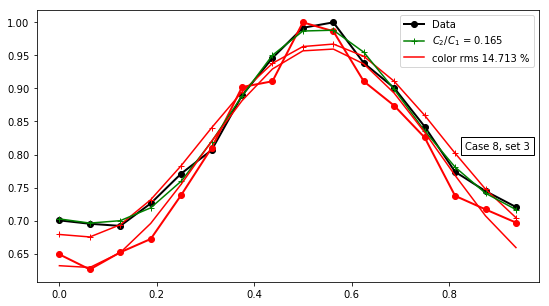

In [6]:
color_rms=[]
ratio=[]
flag=[]
for case in range(1,9):
    for par_set in range(1,4):
        a,b=plot_one(case=case, par_set=par_set)
        color_rms.append(a)
        ratio.append(b)
        flg=globals()["C{}".format(case)]
        #flg2=flg[par_set-1]
        #print(par_set)
        
        flag.append(flg[par_set-1])

Text(0,0.5,'Color rms')

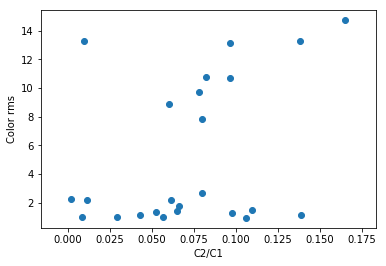

In [7]:
plt.scatter(ratio, color_rms)
plt.xlabel("C2/C1")
plt.ylabel("Color rms")

In [8]:

ratio_recov=[]
color_recov=[]
ratio_no_recov=[]
color_no_recov=[]
       
for k in range(24):
    if flag[k]==1:
        ratio_recov.append(ratio[k])
        color_recov.append(color_rms[k])
        
    else:
        ratio_no_recov.append(ratio[k])
        color_no_recov.append(color_rms[k])
       

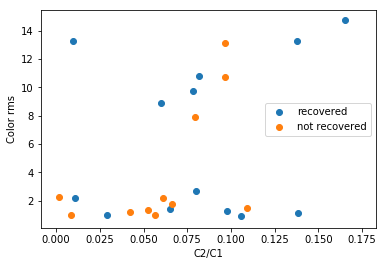

In [9]:
plt.scatter(ratio_recov,color_recov, label="recovered" )
plt.scatter(ratio_no_recov,color_no_recov,label= "not recovered")
plt.xlabel("C2/C1")
plt.ylabel("Color rms")

plt.legend(loc=5)

In [10]:
C1

[0, 1, 1]

In [11]:
C1=[0,1,1]
C2=[0,0,0]
C3=[0,1,0]
C4=[1,1,0]
C5=[1,0,0]
C6=[1,1,1]
C7=[1,1,1]
C8=[1,0,1]

In [15]:
def rms_threshold(P,Npho, Nb):
    
    r=(P/Npho)**0.5*(Npho/(Npho-Nb))
    
    return r

In [26]:
data=np.loadtxt("../run_enhanced/Data_enhanced/data_C8_set3_photon_8Ta_expo_95000.0")

IOError: ../run_enhanced/Data_enhanced/data_C8_set3_photon_8Ta_expo_95000.0 not found.

In [23]:
data.sum()

1050907.0

In [20]:
rms_threshold(12.19, data.sum(),7600000.000000000006)*100

-0.05465159453253854

In [21]:
9*94

846

In [ ]:
73000/12